In [ ]:
import pandas as pd
df = pd.read_csv("/content/diamonds.csv")

In [ ]:
df.shape

(53940, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df_ohe = pd.get_dummies(df)

In [ ]:
df_ohe.shape

(53940, 28)

In [ ]:
# df_ohe = df_ohe.drop(['Unnamed: 0'],axis=1)
df_ohe = df_ohe.iloc[:,1:]

In [ ]:
df_ohe.shape

(53940, 27)

In [ ]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  bool   
 8   cut_Good       53940 non-null  bool   
 9   cut_Ideal      53940 non-null  bool   
 10  cut_Premium    53940 non-null  bool   
 11  cut_Very Good  53940 non-null  bool   
 12  color_D        53940 non-null  bool   
 13  color_E        53940 non-null  bool   
 14  color_F        53940 non-null  bool   
 15  color_G        53940 non-null  bool   
 16  color_H        53940 non-null  bool   
 17  color_I        53940 non-null  bool   
 18  color_

In [ ]:
X = df_ohe

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test = train_test_split(X,
                                  test_size=0.3,
                                  random_state=7)

In [ ]:
X_train.shape,X_test.shape

((37758, 27), (16182, 27))

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
mykmeans = KMeans(3,random_state=7)

In [ ]:
# fit function for training
mykmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=7)

In [ ]:
# Do the predictions / testing
cluster_nos = mykmeans.predict(X_test)

In [ ]:
X_test.iloc[0,:]

carat             0.53
depth             63.2
table             55.0
price             1110
x                 5.17
y                 5.18
z                 3.27
cut_Fair         False
cut_Good         False
cut_Ideal        False
cut_Premium      False
cut_Very Good     True
color_D          False
color_E          False
color_F           True
color_G          False
color_H          False
color_I          False
color_J          False
clarity_I1       False
clarity_IF       False
clarity_SI1      False
clarity_SI2       True
clarity_VS1      False
clarity_VS2      False
clarity_VVS1     False
clarity_VVS2     False
Name: 40026, dtype: object

In [ ]:
cluster_nos[0]

0

In [ ]:
cluster_nos.shape, X_test.shape

((16182,), (16182, 27))

In [ ]:
X_test.loc[cluster_nos == 0,:].shape

(9848, 27)

In [ ]:
X_test.loc[cluster_nos == 1,:].shape

(1684, 27)

In [ ]:
X_test.loc[cluster_nos == 2,:].shape

(4650, 27)

# How to decide value of k?

we iterate over few values of k ( generally 2 to 10)

plot graph of inertia ( WCSS within cluster sum of squares)

Check the L-bow and decide right k

In [ ]:
inertia_values = []
for k in range(2,11):
    mykmeans = KMeans(k,random_state=7)
    mykmeans.fit(X_train)
    inertia_values.append(mykmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
inertia_values

[171597904834.22144,
 72428926612.40598,
 39904492633.801384,
 26191355626.610126,
 17680892885.436028,
 12718507033.604046,
 9869348677.149767,
 7719157520.754606,
 6314804115.344075]

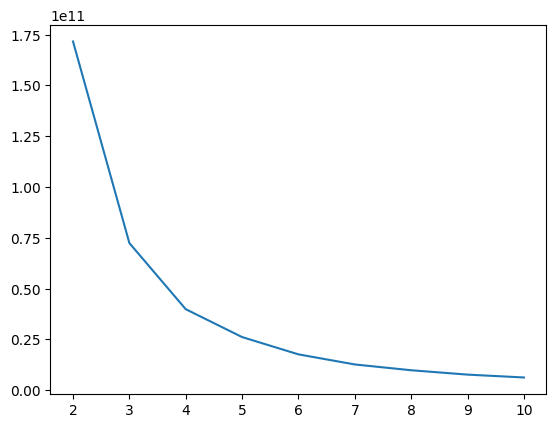

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(2,11)), inertia_values)

# Evaluation Parameters

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# two parameters to silhouette_score
# X : X_test data
# labels : cluster numbers predicted by the algorithm
silhouette_score(X_test, cluster_nos)

0.6628208250209792